In [1]:
import numpy as np
import pandas as pd
import gymnasium as gym
import retro
import matplotlib.pyplot as plt


In [2]:
# how many steps until the game reponds to action
def find_delay(state):
    env = retro.make(game='MortalKombatII-Genesis', render_mode='rgb-array',
                     state = state)
    env.reset()
    action = np.zeros(env.action_space.n)
    # move right
    action[7] = 1
    
    obs, reward, terminated, truncated, info = env.step(action)

    curr_x = info['x_position']

    delay = 1
    while True:
        obs, reward, terminated, truncated, info = env.step(action)

        new_x = info['x_position']
        if new_x != curr_x:
            env.close()
            del env
            return delay

        delay += 1
        if terminated or truncated:
            env.close()
            del env
            break
    return np.nan

In [3]:
states = retro.data.list_states('MortalKombatII-Genesis')
delays = [find_delay(state) for state in states]
df = pd.DataFrame({'state': states, 'delay': delays})

In [4]:
df

,state,delay
0,Level1.JaxVsBaraka,174
1,Level1.JaxVsLiuKang,181
2,Level1.LiuKangVsJax,166
3,Level1.LiuKangVsJax.2P,154
4,Level1.RydenVsRyden,129
5,Level1.SubZeroVsRyden,170
6,LiuKangVsBaraka_VeryHard_01,8
7,LiuKangVsCage_VeryHard_09,1
8,LiuKangVsJade_VeryHard_12,2
9,LiuKangVsJax_VeryHard_03,1


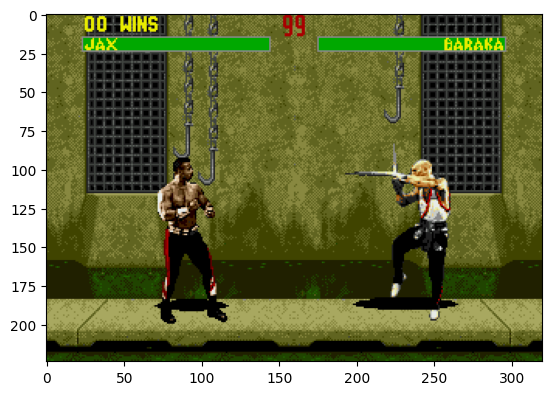

In [8]:
env = retro.make(game='MortalKombatII-Genesis', render_mode='rgb-array',
                     state = states[0], record = '/usr/src/data')
env.reset()
action = np.zeros(env.action_space.n)
# move right
action[7] = 1
    
obs, reward, terminated, truncated, info = env.step(action)

curr_x = info['x_position']
x = info['x_position']
frame = 1
while curr_x == x:
    obs, reward, terminated, truncated, info = env.step(action)
    curr_x = info['x_position']
    if reward != 0:
        print(f'Reward {reward} at frame {frame}??')
    if terminated or truncated:
        break
    frame = frame + 1
env.stop_record()
env.close()

plt.imshow(obs)
plt.show()



In [10]:
info

{'enemy_health': 120,
 'enemy_rounds_won': 0,
 'x_position': 603,
 'enemy_x_position': 750,
 'enemy_y_position': 0,
 'health': 120,
 'wins': 0,
 'rounds_won': 0,
 'y_position': 0}

In [11]:
df.to_csv('/usr/src/data/measured_state_delays.csv')